# **Task 1: Predictive Modeling (Classification)**

Import necessary libraries

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

Load iris dataset

In [5]:
data = load_iris()
X = data.data
y = data.target

### Preprocessing

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Spliting the overall data into 80 to 20 percent

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Declire model

In [8]:
model = RandomForestClassifier()

In [9]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Clssification Report

In [10]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Performed hyperparameter tuning using grid search.

In [12]:
param_grid = {'n_estimators': [25, 50, 100], 'max_depth': [3, 5, None]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'max_depth': None, 'n_estimators': 50}


# **Task 2: Building Dashboards with Power BI/Tableau**

Here the interactive dashboard link [Dashboard](https://app.powerbi.com/view?r=eyJrIjoiZDE1NWU1ZmYtZDIyNy00ZTRiLWEwMGYtMDFlMTE4MjlhYjRmIiwidCI6ImYzZDA5MDA5LWI2ZjItNDI1OS05ZWJjLTkyNzRkNTMxNDc0MSIsImMiOjEwfQ%3D%3D)

# **Task 3: Natural Language Processing (NLP) - Sentiment Analysis**

Improt libraries

In [15]:
import nltk
from nltk.corpus import movie_reviews
import random
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

### Download and prepare data

In [16]:
nltk.download('movie_reviews')
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Collect reviews

In [17]:
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

Sentiment scores

In [18]:
results = []
for text, label in documents[:200]:  # limit to 200
    score = sia.polarity_scores(text)
    results.append((score['compound'], label))

Visualization

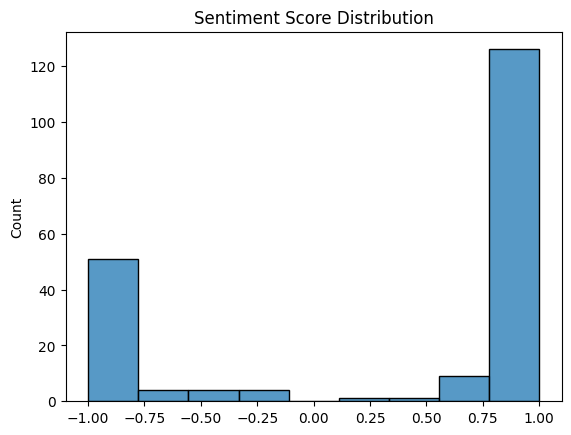

In [19]:
scores, labels = zip(*results)
sns.histplot(scores)
plt.title("Sentiment Score Distribution")
plt.show()

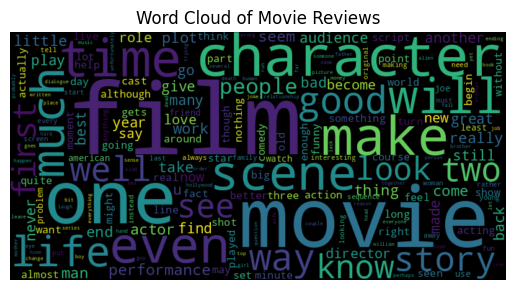

In [20]:
all_text = " ".join([text for text, _ in documents[:200]])
wordcloud = WordCloud(width=800, height=400).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Reviews")
plt.show()